<a href="https://colab.research.google.com/github/theoberva/EPL_predictions/blob/main/EPL_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
data_url = 'https://raw.githubusercontent.com/theoberva/EPL_predictions/main/dataset/results.csv?token=GHSAT0AAAAAAB56RYFQT7TJFLMBY626XRAKZAHI7HA'


In [ ]:
df = pd.read_csv(data_url,encoding='windows-1252')

In [ ]:
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [ ]:
# fix data types
df['DateTime'] = pd.to_datetime(df['DateTime'])

#create new columns
df['hour'] = df['DateTime'].dt.hour
df['date'] = df['DateTime'].dt.date
df['Year'] = df['DateTime'].dt.year

In [ ]:
df.dtypes

Season                   object
DateTime    datetime64[ns, UTC]
HomeTeam                 object
AwayTeam                 object
FTHG                      int64
FTAG                      int64
FTR                      object
HTHG                    float64
HTAG                    float64
HTR                      object
Referee                  object
HS                      float64
AS                      float64
HST                     float64
AST                     float64
HC                      float64
AC                      float64
HF                      float64
AF                      float64
HY                      float64
AY                      float64
HR                      float64
AR                      float64
hour                      int64
date                     object
Year                      int64
dtype: object

In [ ]:
# deal with na values
df.isna().sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
hour           0
date           0
Year           0
dtype: int64

In [ ]:
df.groupby('Season').apply(lambda x: x.isna().any(axis=1).sum())

Season
1993-94    462
1994-95    462
1995-96    380
1996-97    380
1997-98    380
1998-99    380
1999-00    380
2000-01      0
2001-02      0
2002-03      0
2003-04      0
2004-05      0
2005-06      0
2006-07      0
2007-08      0
2008-09      0
2009-10      0
2010-11      0
2011-12      0
2012-13      0
2013-14      0
2014-15      0
2015-16      0
2016-17      0
2017-18      0
2018-19      0
2019-20      0
2020-21      0
2021-22      0
dtype: int64

I would like to use/test most features for my model so to make things simple i will remove the the first few seasons in the dataset that contain all of the missing values.

In [ ]:
df = df.dropna()
df.isna().sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
hour        0
date        0
Year        0
dtype: int64

In [ ]:
df.shape

(8289, 26)

In [ ]:
df['WT'] = df.apply(lambda row: row['HomeTeam'] if row['FTR'] == 'H'
                                        else row['AwayTeam'] if row['FTR'] == 'A'
                                        else np.nan, axis=1)

# Wins by Home or Away Games

<AxesSubplot:xlabel='FTR'>

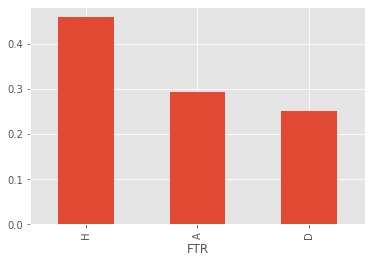

In [ ]:
df.value_counts(subset='FTR',normalize=True).plot(kind='bar')

# Wins by Team

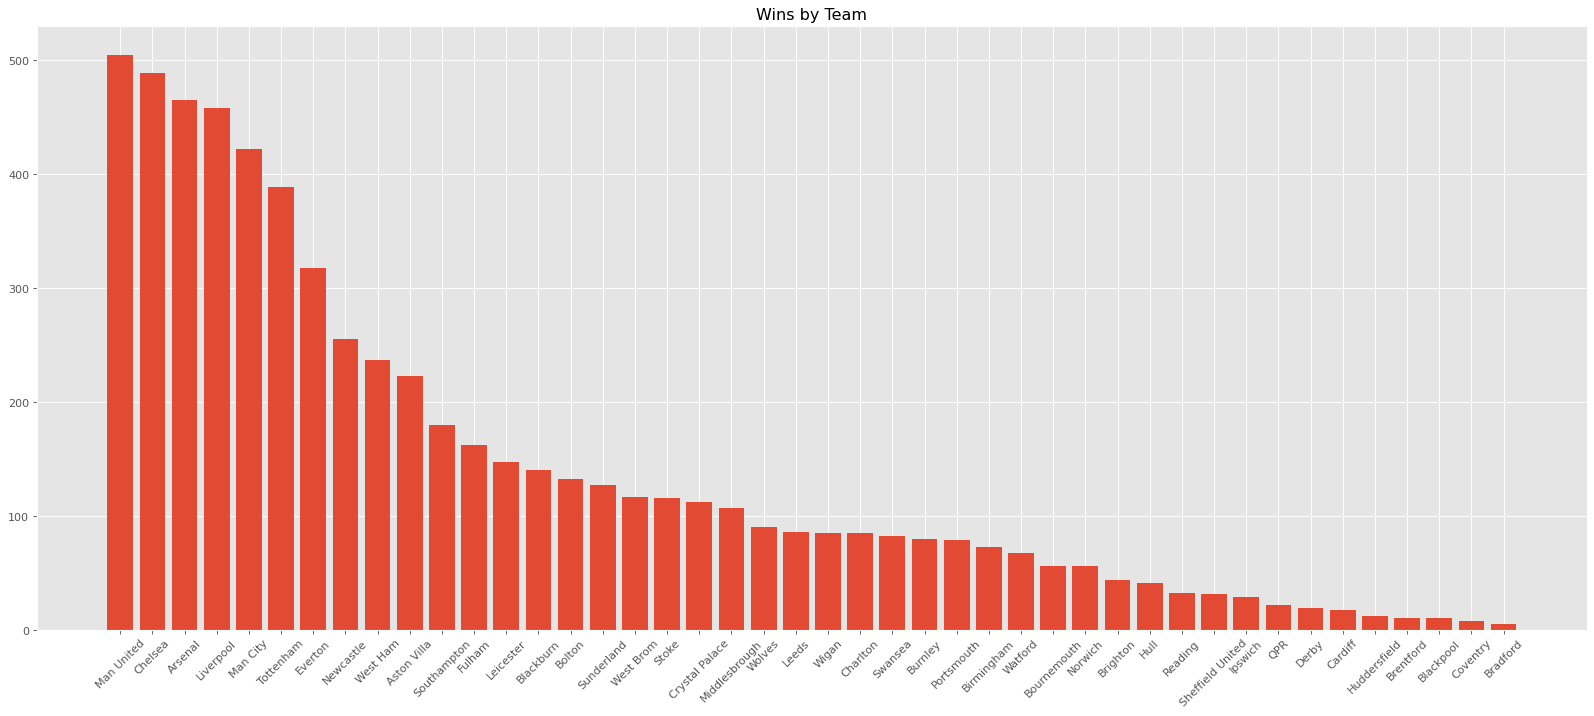

In [ ]:
# create winning team column "WT"
wins = df.groupby(by='WT').size().reset_index(name='Wins')
wins = wins.sort_values(by='Wins', ascending=False).reset_index(drop=True)

plt.figure(figsize=(25, 10), dpi=80)
plt.bar(wins['WT'], wins['Wins'])
plt.title('Wins by Team')
plt.xticks(rotation = 45)
plt.show()


# Win % by Team

In [ ]:
games = (df.groupby('HomeTeam').size() + df.groupby('AwayTeam').size()).reset_index()
games.columns = ['Team','EPL_games']
games = games.sort_values(by ='EPL_games', ascending=False)
games.head()

,Team,EPL_games
24,Liverpool,829
38,Tottenham,829
26,Man United,829
0,Arsenal,828
17,Everton,828


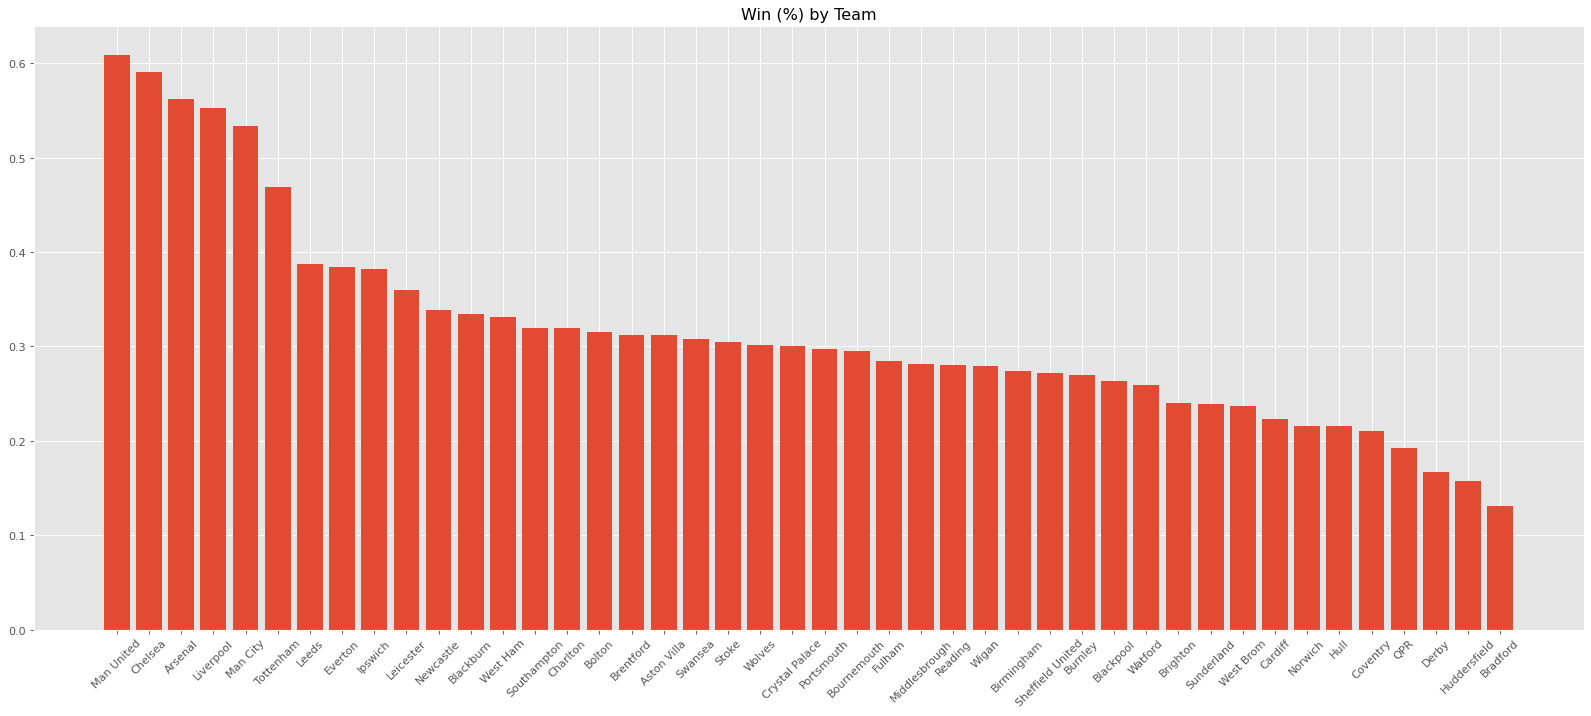

In [ ]:
win_pct = games.merge(right= wins, right_on='WT', left_on='Team')
win_pct['pct'] = win_pct['Wins'] / win_pct['EPL_games']
win_pct = win_pct[['Team', 'EPL_games', 'Wins', 'pct']].sort_values(by='pct', ascending=False)

plt.figure(figsize=(25, 10), dpi=80)
plt.bar(win_pct['Team'], win_pct['pct'])
plt.title('Win (%) by Team')
plt.xticks(rotation = 45)
plt.show()

# Rolling Win % over time by Team

In [ ]:

# concatenate home and away team data into one dataframe
home_teams = df[['date', 'HomeTeam', 'WT', 'Year']].rename(columns={'HomeTeam': 'Team'})
away_teams = df[['date', 'AwayTeam', 'WT', 'Year']].rename(columns={'AwayTeam': 'Team'})
teams = pd.concat([home_teams, away_teams]).sort_values('date').reset_index(drop=True)


In [ ]:
teams['WT'] = teams['WT'].fillna('Draw')
teams = teams.sort_values(['Team','date'])

teams['WT_binary'] = np.where((teams['WT'] == teams['Team']), 1,0)
teams = teams.drop(columns='WT')

In [ ]:
teams = teams.groupby(['Team','Year'])[['WT_binary']].agg(('sum','count')).reset_index()

In [ ]:
teams.columns = teams.columns.droplevel(1)
teams.columns = ['Team','Year','Wins','Games']

In [ ]:
teams['win_pct'] = round(teams['Wins'] / teams['Games'],3)
teams = teams[['Team','Year','Games', 'Wins','win_pct']]

In [ ]:
teams

,Team,Year,Games,Wins,win_pct
0,Arsenal,2000,21,11,0.524
1,Arsenal,2001,37,20,0.541
2,Arsenal,2002,39,28,0.718
3,Arsenal,2003,36,23,0.639
4,Arsenal,2004,39,26,0.667
...,...,...,...,...,...
518,Wolves,2018,20,8,0.400
519,Wolves,2019,38,15,0.395
520,Wolves,2020,34,14,0.412
521,Wolves,2021,40,13,0.325


In [ ]:
# calculate cumulative wins %
teams['CumulativeWinPct'] = teams.groupby('Team')['win_pct'].cumsum()
teams['CumulativeWins'] = teams.groupby('Team')['Wins'].cumsum()
teams['CumulativeGames'] = teams.groupby('Team')['Games'].cumsum()
# calculate count of seasons
teams['CumulativeCount'] = teams.groupby('Team')['win_pct'].cumcount() + 1

# Calculate Running average
teams['RunningAvg'] = teams['CumulativeWinPct'] / teams['CumulativeCount'] 


In [ ]:
# get top 10 teams

top10 = win_pct[win_pct['EPL_games'] > 200]
top10 = top10.nlargest(columns='pct', n=10)
top10 = top10['Team'].tolist()

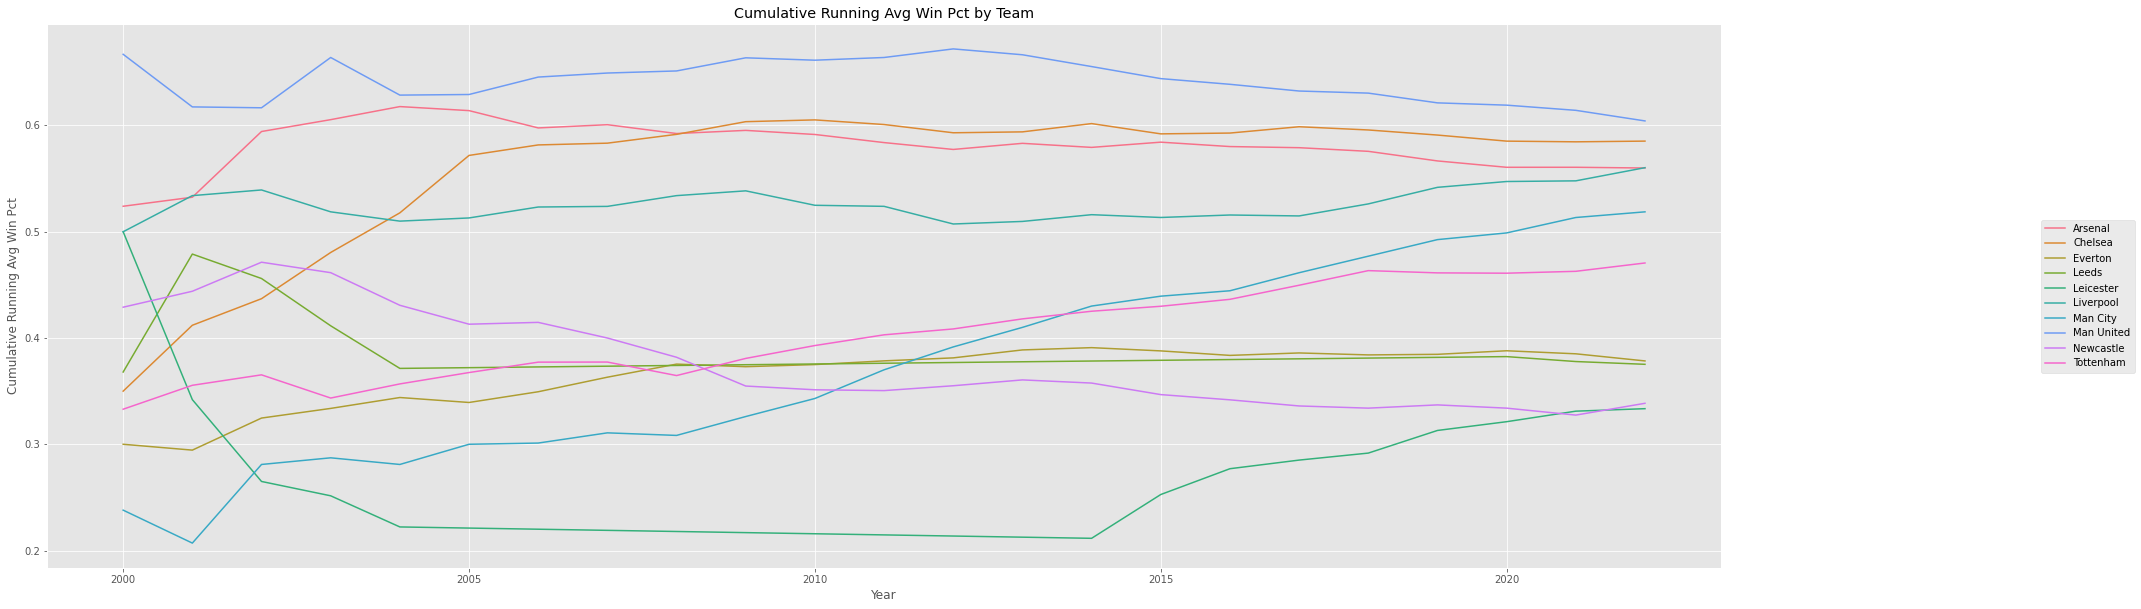

In [ ]:
# create line plot with seaborn to show the running average for the top 10 teams

plt.figure(figsize=(30,10))
sns.lineplot(x='Year', y='RunningAvg', hue='Team', data=teams[teams['Team'].isin(top10)])

# add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Running Avg Win Pct')
plt.title('Cumulative Running Avg Win Pct by Team')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# show the plot
plt.show()

# Estimate True Win %

The beta distribution is used to model continuous random variables whose range is between 0 and 1. It is often used as a prior distribution of the parameter p (which is bounded between 0 and 1) of the binomial distribution.

In [ ]:
## get a vector of win% fir teams with atleast 200 games
over200 = games[games['EPL_games'] > 200]['Team'].tolist()

#calculate the mean and SD of population
mean = round(teams[teams['Team'].isin(over200)]['RunningAvg'].mean(),4)
sd = round(teams[teams['Team'].isin(over200)]['RunningAvg'].std(),4)

print(f"Mean: {mean} \nStandard Deviation: {sd}\n")

# Estimate the beta params (alpha & beta)
def beta_params(avg, var):
  alpha = avg * (avg * (1- avg) / var - 1)
  beta = alpha * (1 - avg)/avg

  return round(alpha,4) , round(beta,4)

a, b = beta_params(mean, sd**2)
print(f"Alpha: {a}\nBeta: {b}")


Mean: 0.3625 
Standard Deviation: 0.1279

Alpha: 4.7585
Beta: 8.3684


In [ ]:
from scipy.stats import beta

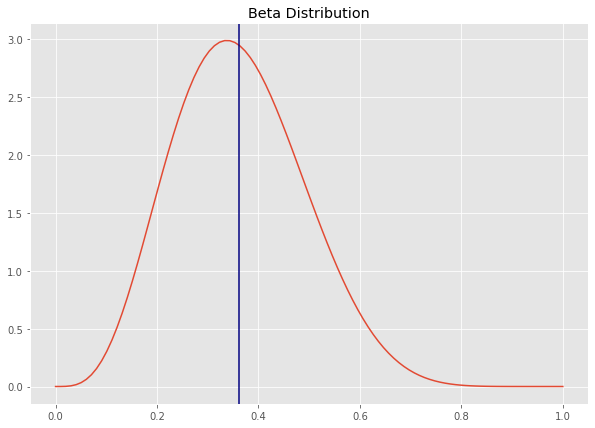

In [ ]:
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a, b)

plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.axvline(mean, color='navy')
plt.title('Beta Distribution')
plt.show()

In [ ]:
# create a bayes adjustment
bayes_adj = teams[['Team','Year','CumulativeGames','CumulativeWins']].copy()
bayes_adj['team_alpha'] = a + bayes_adj['CumulativeWins']
bayes_adj['team_beta']  = (b + (bayes_adj['CumulativeGames'] -bayes_adj['CumulativeWins'] ))
bayes_adj['un_ajd_win_pct'] = bayes_adj['CumulativeWins'] / bayes_adj['CumulativeGames']
bayes_adj['bayes_ajd_win_pct'] = bayes_adj['team_alpha']  / ( bayes_adj['team_alpha'] + bayes_adj['team_beta'])
bayes_adj['Variance'] = (bayes_adj['team_alpha'] * bayes_adj['team_beta']) /  ( bayes_adj['team_alpha'] + bayes_adj['team_beta'])**2 * ( bayes_adj['team_alpha'] + bayes_adj['team_beta'] + 1)
bayes_adj['SD'] = np.sqrt(bayes_adj['Variance'])

In [ ]:
bayes_adj[bayes_adj['Team'] == 'Chelsea']

,Team,Year,CumulativeGames,CumulativeWins,team_alpha,team_beta,un_ajd_win_pct,bayes_ajd_win_pct,Variance,SD
119,Chelsea,2000,20,7,11.7585,21.3684,0.350000,0.354953,7.813744,2.795307
120,Chelsea,2001,58,25,29.7585,41.3684,0.431034,0.418386,17.551299,4.189427
121,Chelsea,2002,97,44,48.7585,61.3684,0.453608,0.442748,27.417478,5.236170
122,Chelsea,2003,133,66,70.7585,75.3684,0.496241,0.484226,36.745119,6.061775
123,Chelsea,2004,172,92,96.7585,88.3684,0.534884,0.522660,46.436150,6.814408
124,Chelsea,2005,210,124,128.7585,94.3684,0.590476,0.577064,54.700667,7.395990
125,Chelsea,2006,249,149,153.7585,108.3684,0.598394,0.586580,63.809282,7.988071
126,Chelsea,2007,286,171,175.7585,123.3684,0.597902,0.587572,72.730111,8.528195
127,Chelsea,2008,324,196,200.7585,136.3684,0.604938,0.595498,81.448032,9.024856
128,Chelsea,2009,362,223,227.7585,147.3684,0.616022,0.607151,89.713322,9.471712
